In [1]:
import pandas as pnd
import numpy as npy
import matplotlib.pyplot as plt
import os
import seaborn as sbs

In [2]:
df = pnd.read_csv('C:\\Users\\barje\\Downloads\\diabetes.data',
                 sep='\\s+',)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


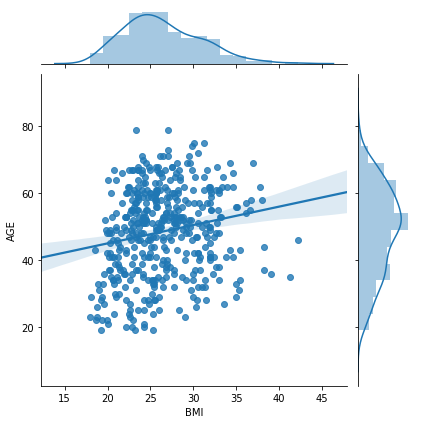

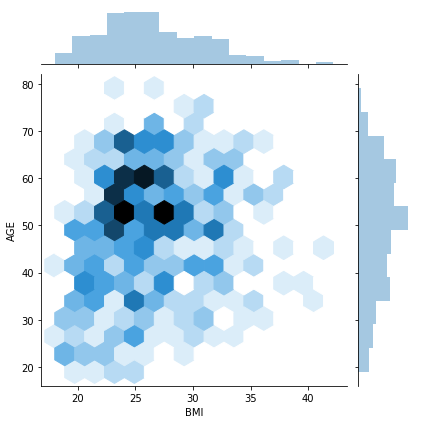

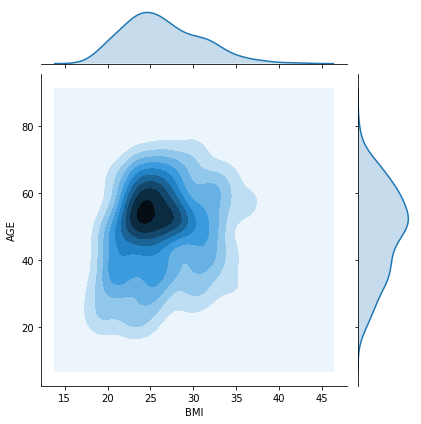

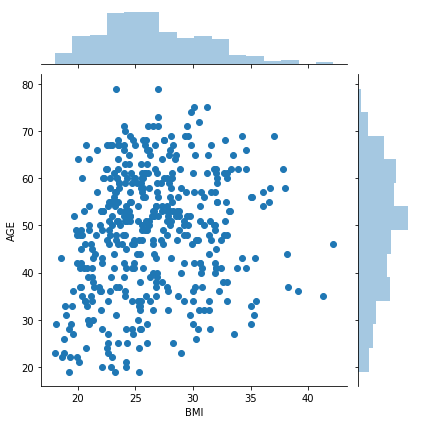

In [3]:
# multiple plots on the same figure 
for jointplot_kind in ['reg', 'hex', 'kde', 'scatter']:
    sbs.jointplot('BMI', 'AGE', data=df, kind=jointplot_kind)
   

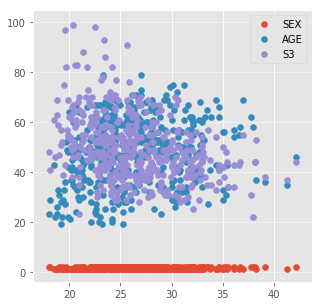

In [4]:
#multiple plots on the same axes 
plt.style.use("ggplot")

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.grid(axis='y', alpha=0.5)
axes.scatter(df['BMI'], df['SEX'])
axes.scatter(df['BMI'], df['AGE'])
axes.scatter(df['BMI'], df['S3'])
#axes.set_title(f'Alcohol comparisons')
axes.legend()

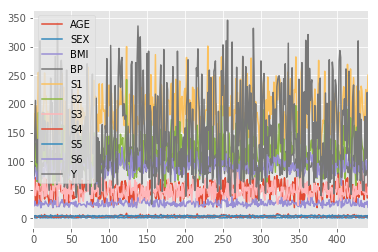

In [5]:
#multiple plots on the same axes 
df.plot()

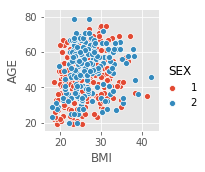

In [6]:
#colours, markers, sizes, shapes, hue, etc... 

df2= sbs.pairplot(data=df, x_vars="BMI", y_vars="AGE", hue ='SEX' )

In [ ]:
# 3D visualizations 

import itertools
from mpl_toolkits.mplot3d import Axes3D


os.makedirs('plots/3d', exist_ok=True)

plt.style.use("ggplot")

m_df = df[df['SEX'] == 2]
f_df = df[df['SEX'] == 1]

for col0, col1, col2, col3, col4 in list(itertools.combinations(df.columns, 5)):
    fig = plt.figure(figsize=(6, 6))
    axes = fig.add_subplot(1, 1, 1, projection='3d')
    fig.suptitle(f'{col0} to {col1} to {col2} (color: {col3}, size: {col4})')

    axes.scatter(m_df[col0], m_df[col1], m_df[col2], label=f'Male', c=m_df[col3], s=m_df[col4], marker='s',
                 alpha=0.6, edgecolors='black', cmap='YlGn')
    axes.scatter(f_df[col0], f_df[col1], f_df[col2], label=f'Female', c=f_df[col3], s=f_df[col4], marker='o',
                 alpha=0.6, edgecolors='black', cmap='RdPu')

    axes.set_xlabel(col0)
    axes.set_ylabel(col1)
    axes.set_zlabel(col2)
    axes.legend()
    plt.savefig(f'plots/3d/boston_{col0}_{col1}_{col2}_{col3}_{col4}_scatter.png', dpi=300)
    #plt.close(fig)

#plt.close()
